# Research Assignment Code: 
# The MW-M31 Dark Matter Merger Remnant 3D Distribution
### Cassandra Bodin

## My goal is to model the 3D distribution of dark matter within the halos of the Milky Way (MW) and Andromeda (M31) galaxies before, during, and after their merger. Once modeled, I will fit a shape to each dark matter distribution. The possible shapes are a triaxial ellipsoid, an oblate spheroid, or a prolate spheroid.

Triaxial ellipsoid is an ellipsoid where each of the three axes are different lengths ($a \neq b \neq c$). A ellipsoid follows the equation $\frac{x^2}{a^2} +\frac{y^2}{b} +\frac{z^2}{c} =1$

Oblte spheroid is a sphere that has been flatened into a lentil like shape ($c<a$ and $a=b$)
Prolate spheroid is a sphere that has been elongated into a football like shape ($c>a$ and $a=b$)
A spheroid follows the equation $\frac{x^2+y^2}{a^2} +\frac{z^2}{c} =1$

**where a is the semi-major axis, b is the semi-minor axis, and c is the distance from the center to the edge along the line of symmetry

### Step 1: I will be modifying Lab7 to plot the distributions for the dark matter halos in 3D

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

In [3]:
#Create a COM of object for M31 Halo Using Code from CenterOfMass
COMH_M31 = CenterOfMass("M31_000.txt",1) #note this is before the merger
#COMH_M31 = CenterOfMass("M31_400.txt",1) #note this is during the merger
#COMH_M31 = CenterOfMass("M31_801.txt",1) #note this is tafter the merger


# Compute COM of M31 using disk particles
COMP_M31 = COMH_M31.COM_P(0.1)
COMV_M31 = COMH_M31.COM_V(COMP_M31[0],COMP_M31[1],COMP_M31[2])


# Determine positions of disk particles relative to COM 
xH_M31 = COMH_M31.x - COMP_M31[0].value 
yH_M31 = COMH_M31.y - COMP_M31[1].value 
zH_M31 = COMH_M31.z - COMP_M31[2].value 

# total magnitude
rtot = np.sqrt(xH_M31**2 + yH_M31**2 + zH_M31**2)

# Determine velocities of disk particles relatiev to COM motion
vxH_M31 = COMH_M31.vx - COMV_M31[0].value 
vyH_M31 = COMH_M31.vy - COMV_M31[1].value 
vzH_M31 = COMH_M31.vz - COMV_M31[2].value 

# total velocity 
vtot = np.sqrt(vxH_M31**2 + vyH_M31**2 + vzH_M31**2)

# Vectors for r and v 
r = np.array([xH_M31,yH_M31,zH_M31]).T # transposed 
v = np.array([vxH_M31,vyH_M31,vzH_M31]).T

In [4]:
##Create a COM of object for MW Halo Using Code from CenterOfMass
COMH_MW = CenterOfMass("MW_000.txt",1)#note this is before the merger
#COMH_M31 = CenterOfMass("MW_400.txt",1) #note this is during the merger
#COMH_M31 = CenterOfMass("MW_801.txt",1) #note this is tafter the merger


# Compute COM of MW using disk particles
COMP_MW = COMH_MW.COM_P(0.1)
COMV_MW = COMH_MW.COM_V(COMP_MW[0],COMP_MW[1],COMP_MW[2])


# Determine positions of disk particles relative to COM 
xH_MW = COMH_MW.x - COMP_MW[0].value 
yH_MW = COMH_MW.y - COMP_MW[1].value 
zH_MW = COMH_MW.z - COMP_MW[2].value 

# total magnitude
rtot = np.sqrt(xH_MW**2 + yH_MW**2 + zH_MW**2)

# Determine velocities of disk particles relatiev to COM motion
vxH_MW = COMH_MW.vx - COMV_MW[0].value 
vyH_MW = COMH_MW.vy - COMV_MW[1].value 
vzH_MW = COMH_MW.vz - COMV_MW[2].value 

# total velocity 
vtot = np.sqrt(vxH_MW**2 + vyH_MW**2 + vzH_MW**2)

# Vectors for r and v 
r = np.array([xH_MW,yH_MW,zH_MW]).T # transposed 
v = np.array([vxH_MW,vyH_MW,vzH_MW]).T

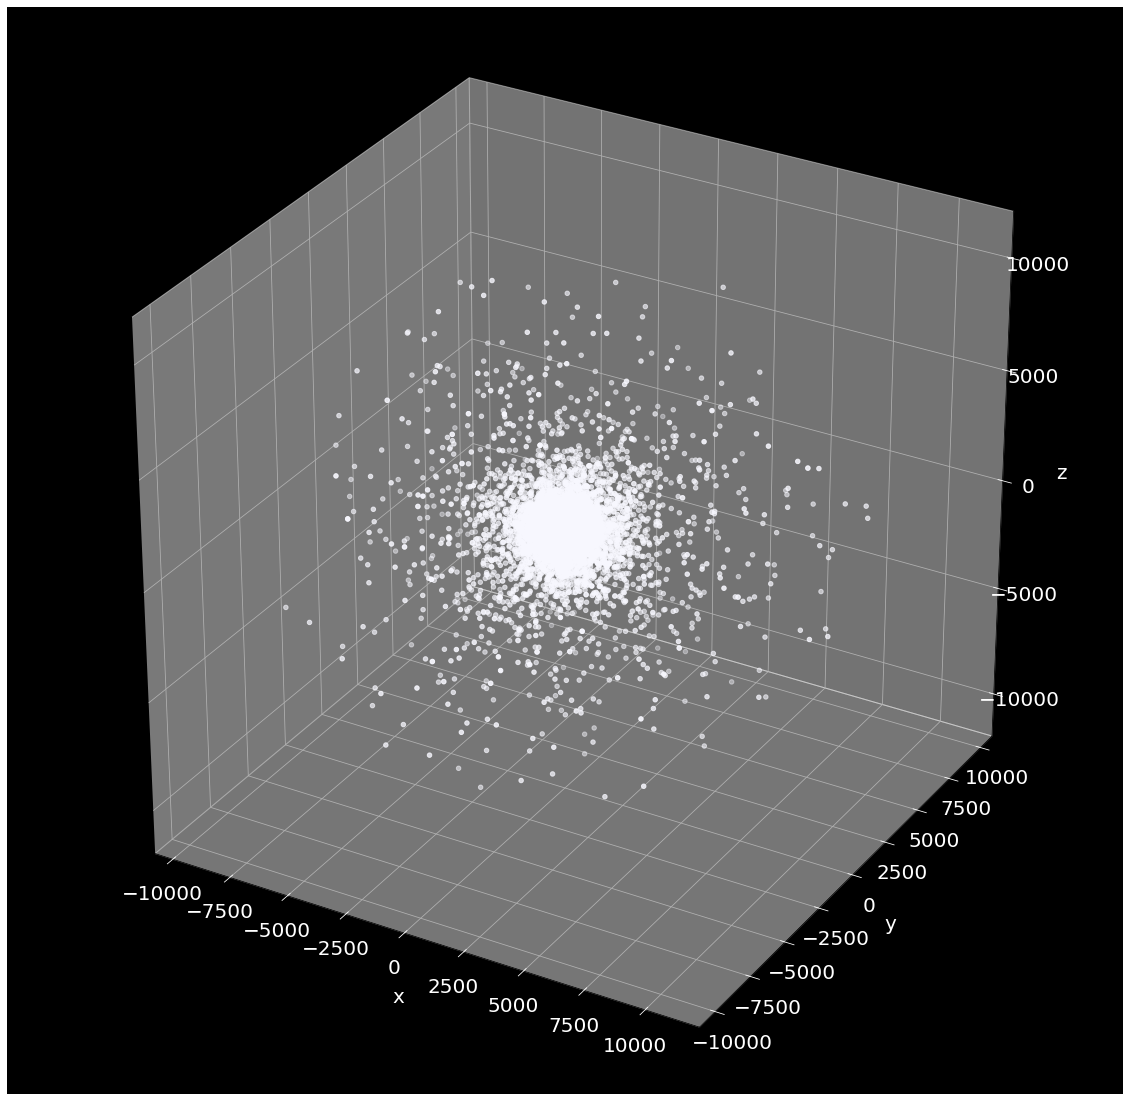

In [91]:
#Plotting the 3D contour plot (code found on https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
#uses mpl_toolkits.mplot3D
#makes a 3D plot of object, choosing to make a contour plot first
#   might change to wirefram or surface plot


#Use the MW_000.txt file first to test the plotting
#Shape of both halos should be assumed to be roughly spheroidal before the merger. 
#If this works then move onto other files.

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection='3d')

#change the background color to black
ax.set_facecolor('black')

ax.scatter(xH_M31,yH_M31,zH_M31, color='ghostwhite')

ax.set_xlabel('x',fontsize=20, labelpad=20, color='white')
ax.set_ylabel('y',fontsize=20, labelpad=20, color='white')
ax.set_zlabel('z',fontsize=20, labelpad=20, color='white')
ax.tick_params(axis='both', labelsize=20, pad=10, colors='white')

#ax.view_init(60,35) # changes the view to 60 degrees above the xy plane and rotated 35 degrees counter clockwise acout z axis
plt.savefig('M31_begindistr.png')
plt.show()

### Step 2: I will overplot the shapes of a triaxial ellipsoid, oblate spheroid, and prolate spheroid on top of the dark matter distribution


Triaxial ellipsoid ($a \neq b \neq c$) - An ellipsoid follows the equation $\frac{x^2}{a^2} +\frac{y^2}{b} +\frac{z^2}{c} =1$

Oblte spheroid ($c<a$ and $a=b$)
Prolate spheroid ($c>a$ and $a=b$) -
A spheroid follows the equation $\frac{x^2+y^2}{a^2} +\frac{z^2}{c} =1$

### Step 3: Eliminate shapes that don't fit, adjust the parameters of the shape that is closest until it fits

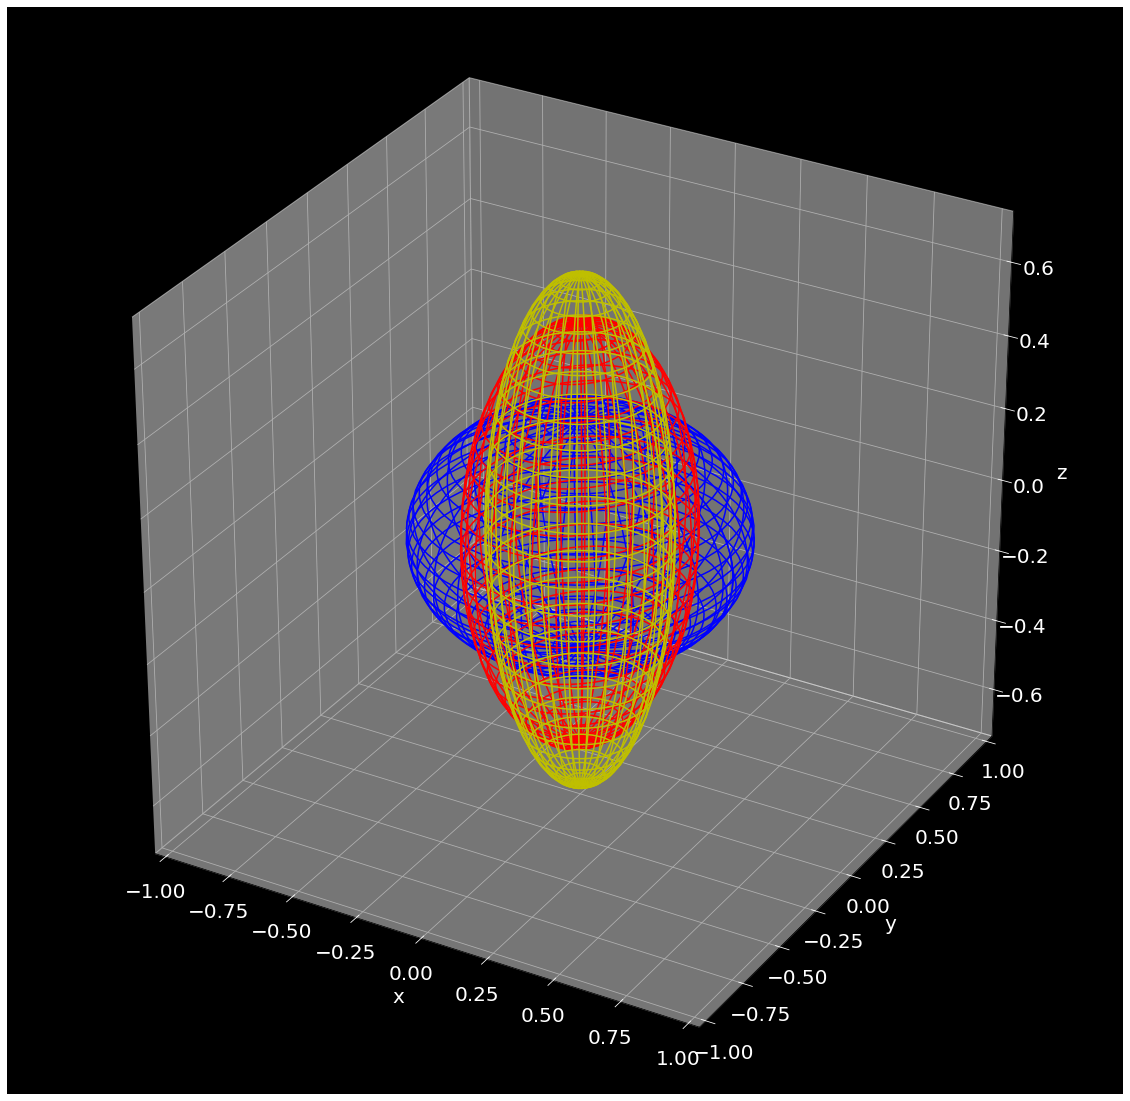

In [89]:
#plot also uses mpl_toolkits.mplot3D
# likely import Axes3D
#from mpl_toolkits3D import Axes3D
#plot using wire frame

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection='3d')
#change the background color to black
ax.set_facecolor('black')

#set up parameters for the shape we're fitting the 3D distribution to
u=np.linspace(0.0, 2.0*np.pi,60)
v=np.linspace(0.0, np.pi,60)

#shape 1 Triaxial ellipsoid
coef1=(7,5,3)
rx1,ry1,rz1=1/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z

#shape 2 Prolate Spheroid
coef2=(10,10,2)
rx2,ry2,rz2=1/np.sqrt(coef2)
x2= rx2*np.outer(np.cos(u),np.sin(v)) #choose size for x
y2= ry2*np.outer(np.sin(u),np.sin(v)) #choose size for y
z2= rz2*np.outer(np.ones_like(u),np.cos(v)) #choose size for z

#shape 3 Oblate Spheroid
coef3=(3,3,10)
rx3,ry3,rz3=1/np.sqrt(coef3)
x3= rx3*np.outer(np.cos(u),np.sin(v)) #choose size for x
y3= ry3*np.outer(np.sin(u),np.sin(v)) #choose size for y
z3= rz3*np.outer(np.ones_like(u),np.cos(v)) #choose size for z

#plot the shape
ax.plot_wireframe(x1,y1,z1, color='r')
ax.plot_wireframe(x2,y2,z2, color='y')
ax.plot_wireframe(x3,y3,z3, color='b')

plt.xlim(-1,1)
plt.ylim(-1,1)
#plt.zlim(-1,1)

ax.set_xlabel('x',fontsize=20, labelpad=20, color='white')
ax.set_ylabel('y',fontsize=20, labelpad=20, color='white')
ax.set_zlabel('z',fontsize=20, labelpad=20, color='white')
ax.tick_params(axis='both', labelsize=20, pad=10, colors='white')

plt.show()